In [1]:
import sys
sys.path.append("../")
from base import benchmark_simple
import numpy as np
import matplotlib.pyplot as plt


In [2]:
optimization_problem_data = [
    {
        "name": "x",
        "category": "uniform",
        "search_space": {
            "low": 0,
            "high": 2 * np.pi,
        }
    },
]

def function_to_optimize(x):
    return np.cos(x) + np.cos(2 * x + 1)

target = {"x": np.linspace(0, 2 * np.pi, 1000000)[
    np.argmin([function_to_optimize(x) for x in np.linspace(0, 2 * np.pi, 1000000)])]
}

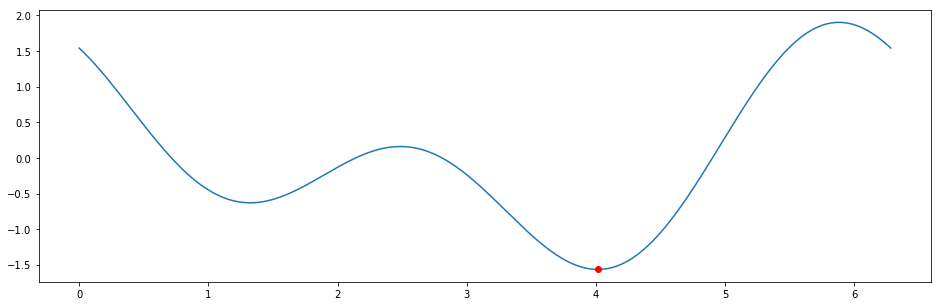

In [3]:
# plot target function
t = np.linspace(0, 2 * np.pi, 1000)
plt.figure(figsize=(16, 5))
plt.plot(t, function_to_optimize(t))
plt.plot([target["x"]], [function_to_optimize(**target)], "ro") 

In [4]:
from benderopt.base import OptimizationProblem, Observation
from benderopt.optimizer import optimizers

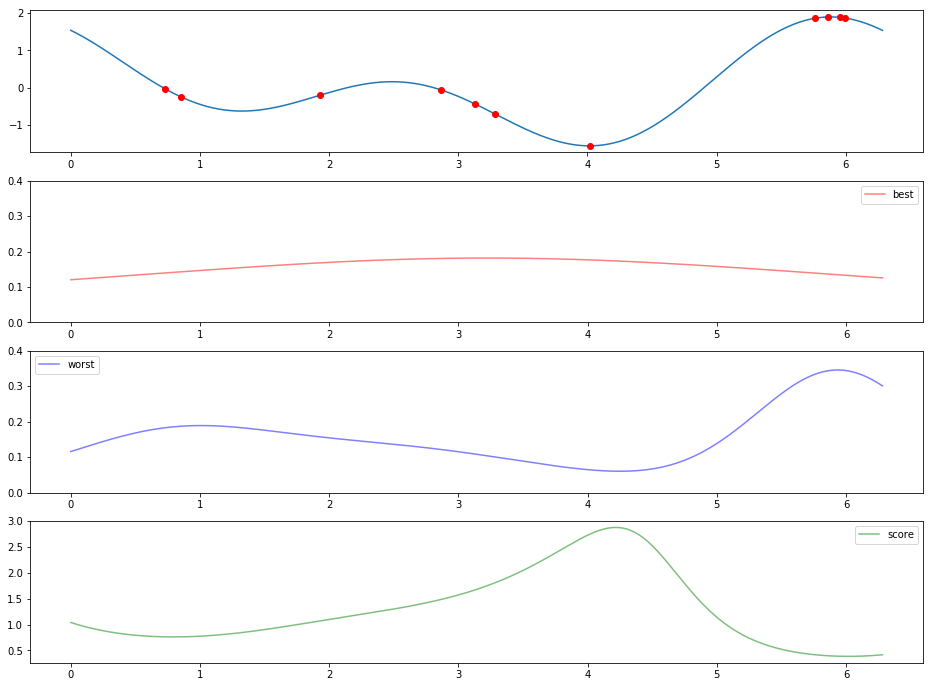

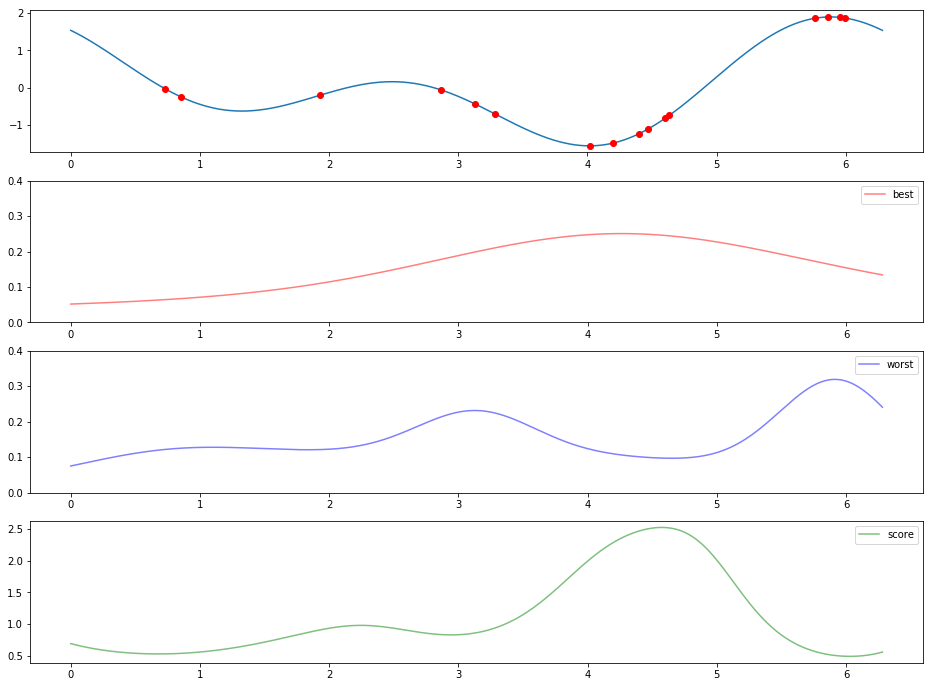

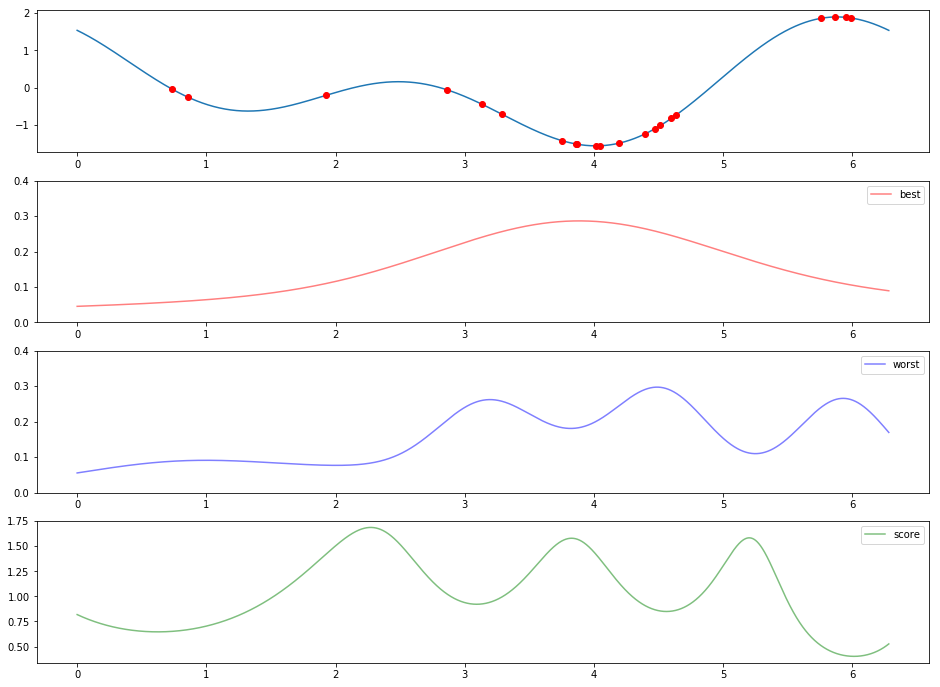

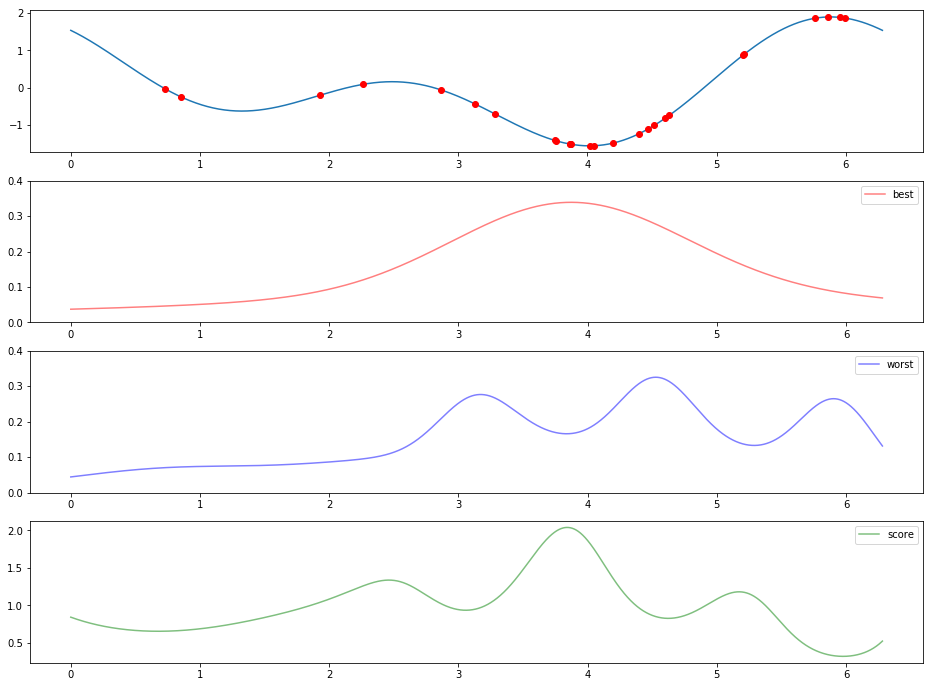

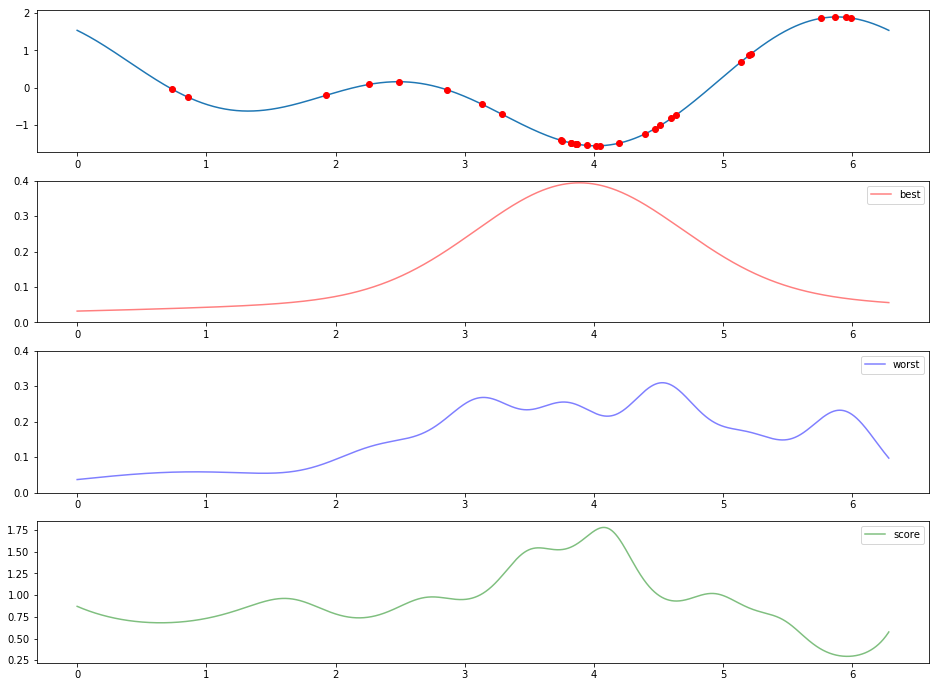

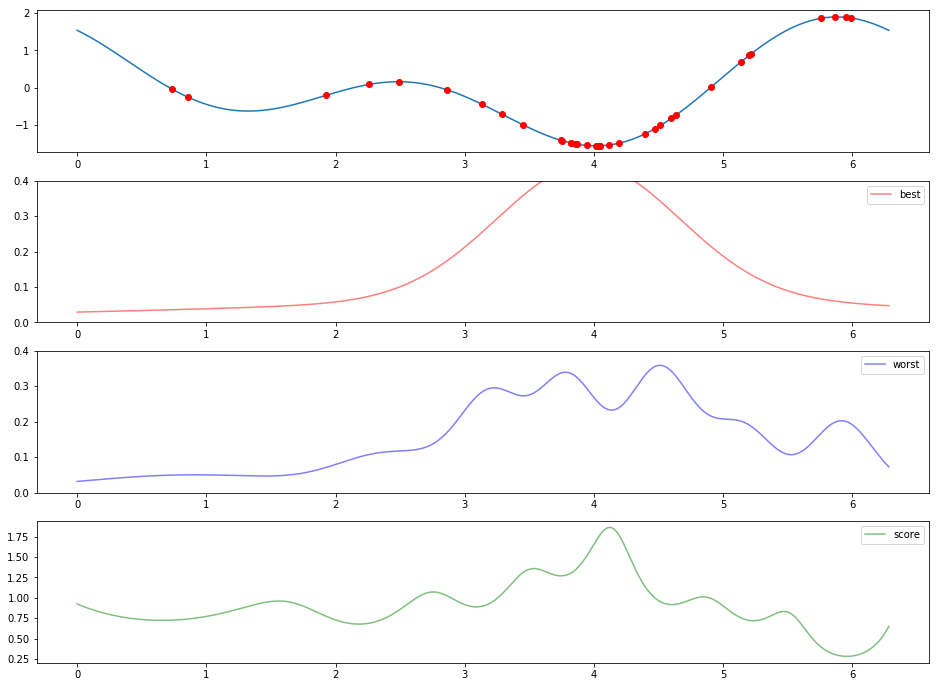

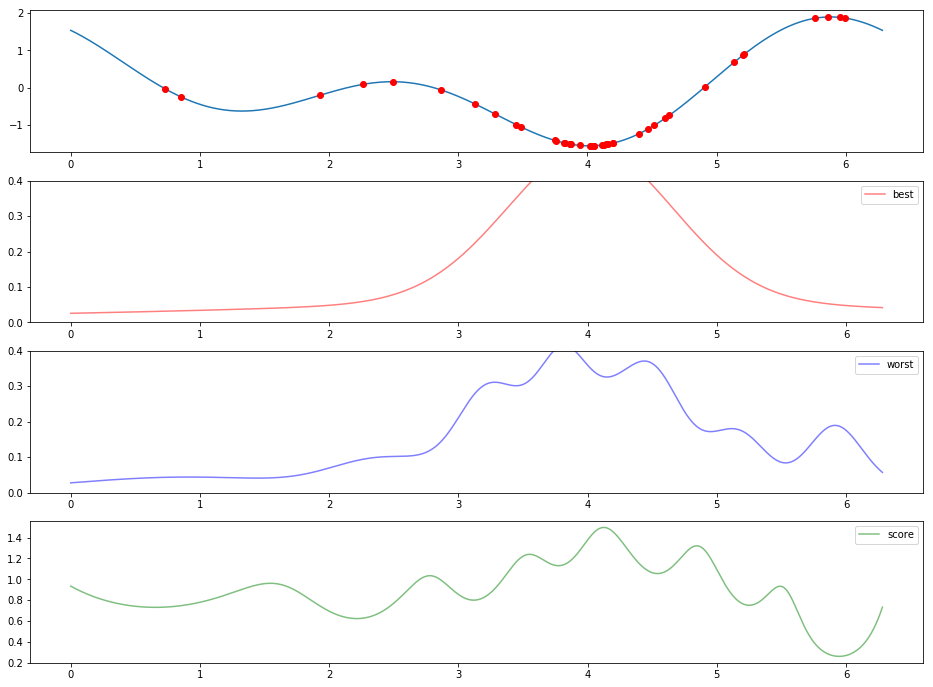

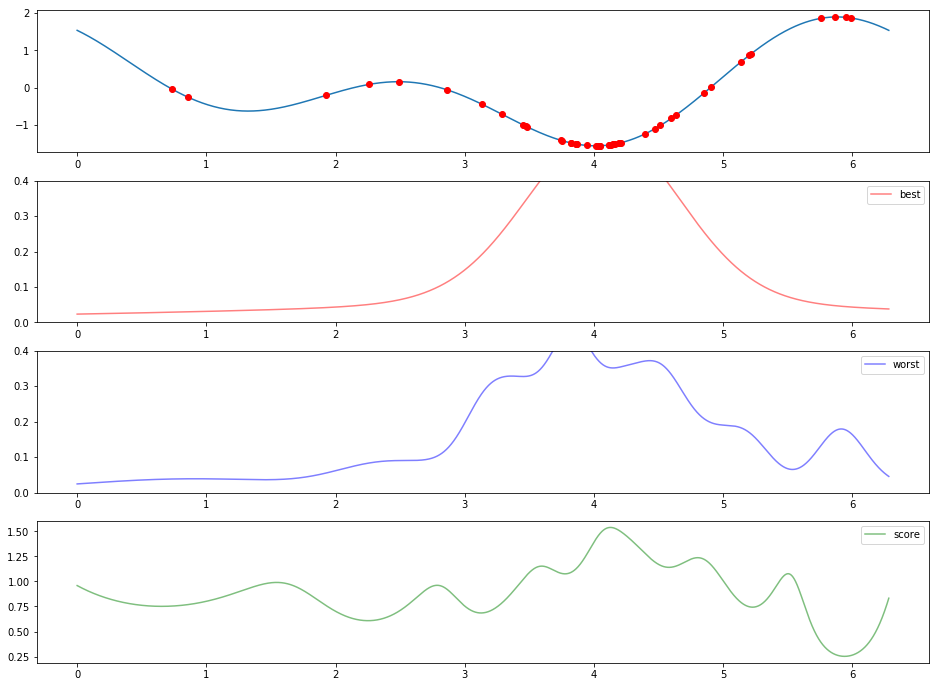

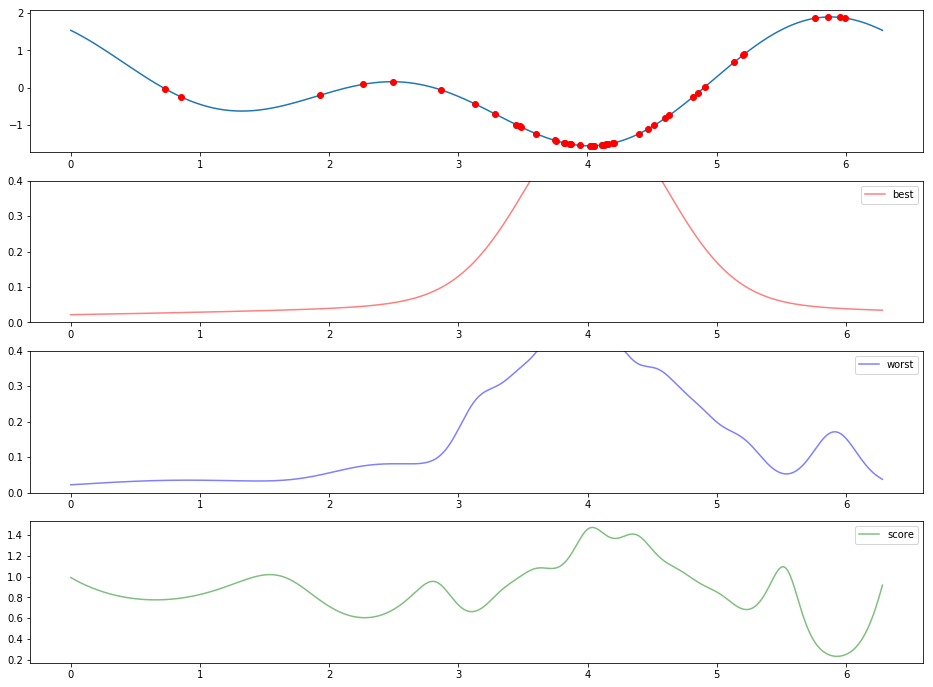

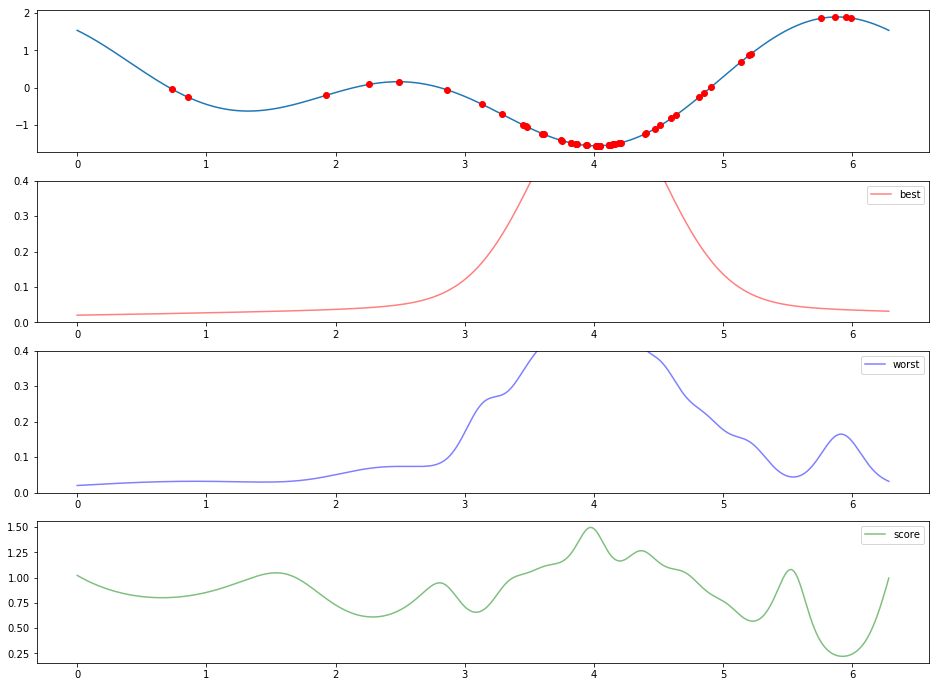

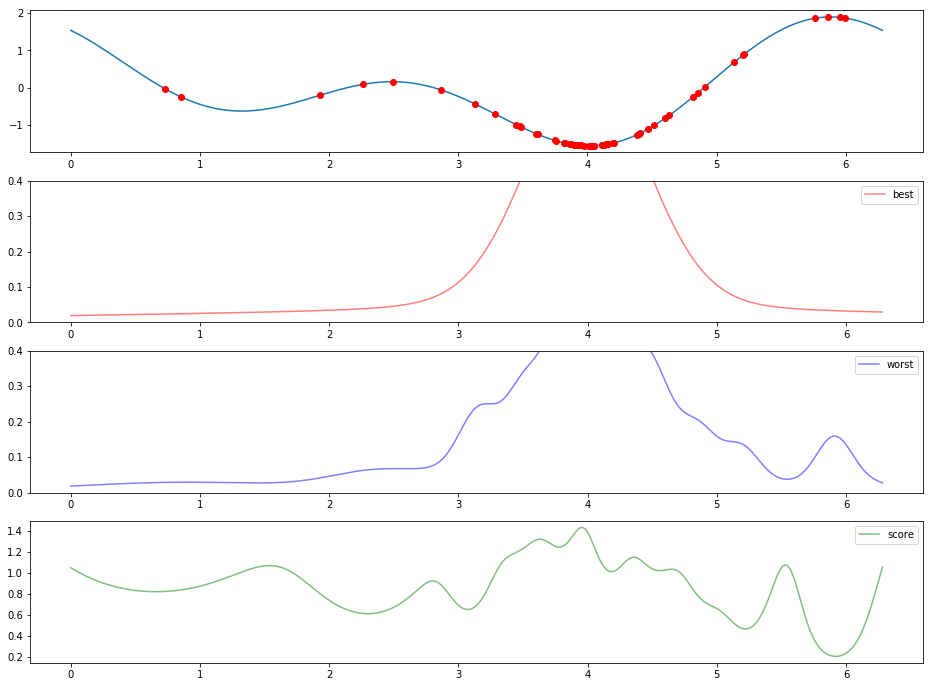

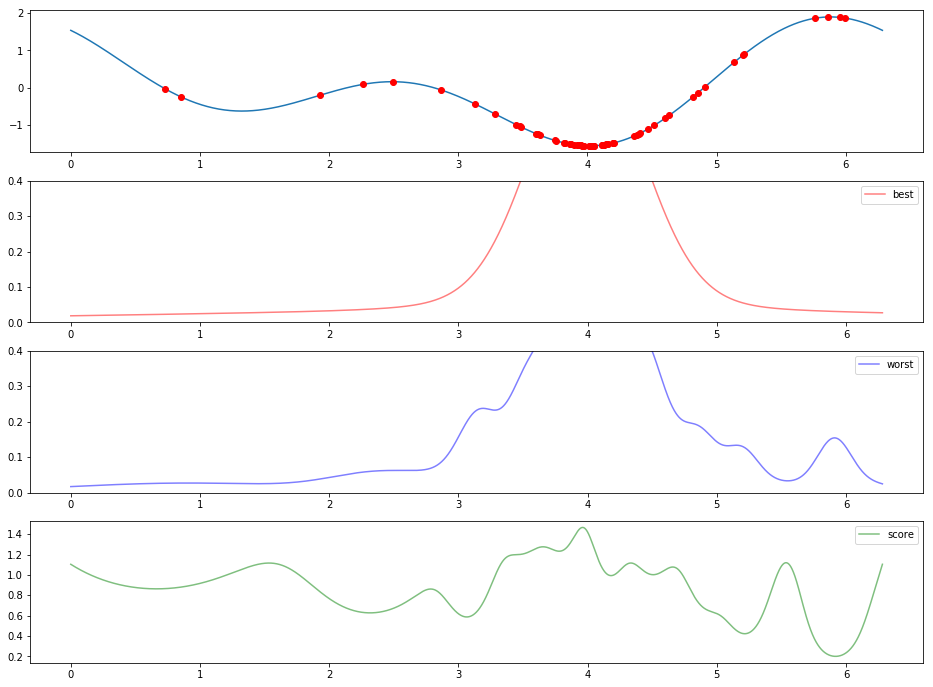

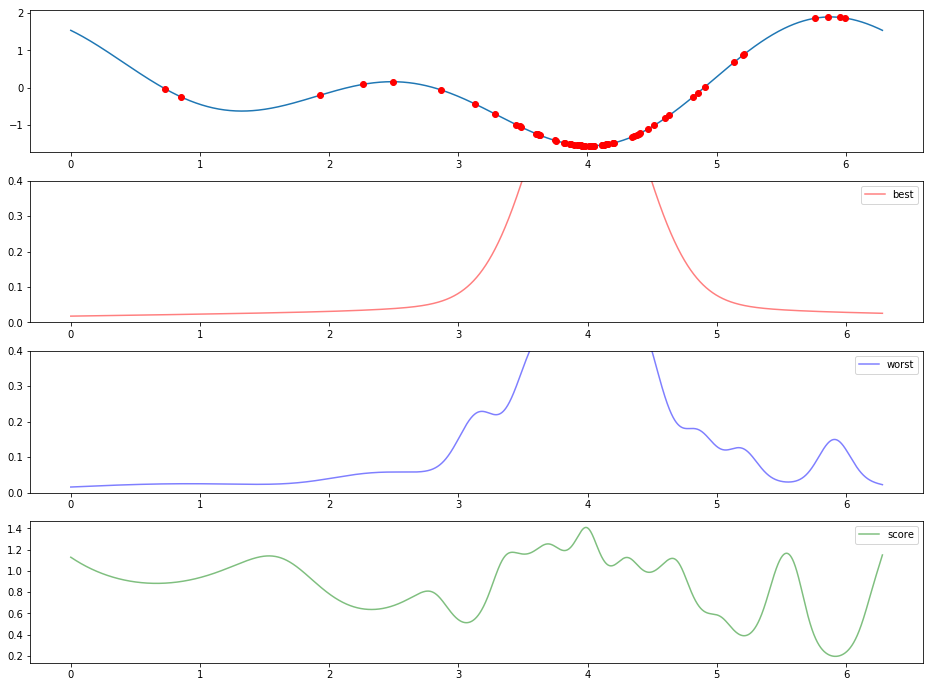

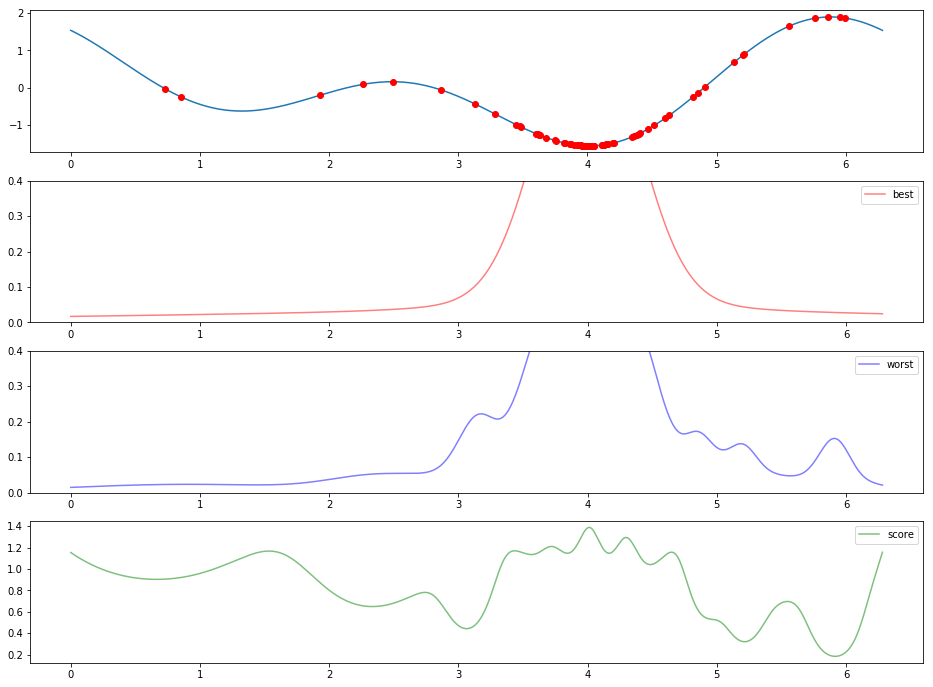

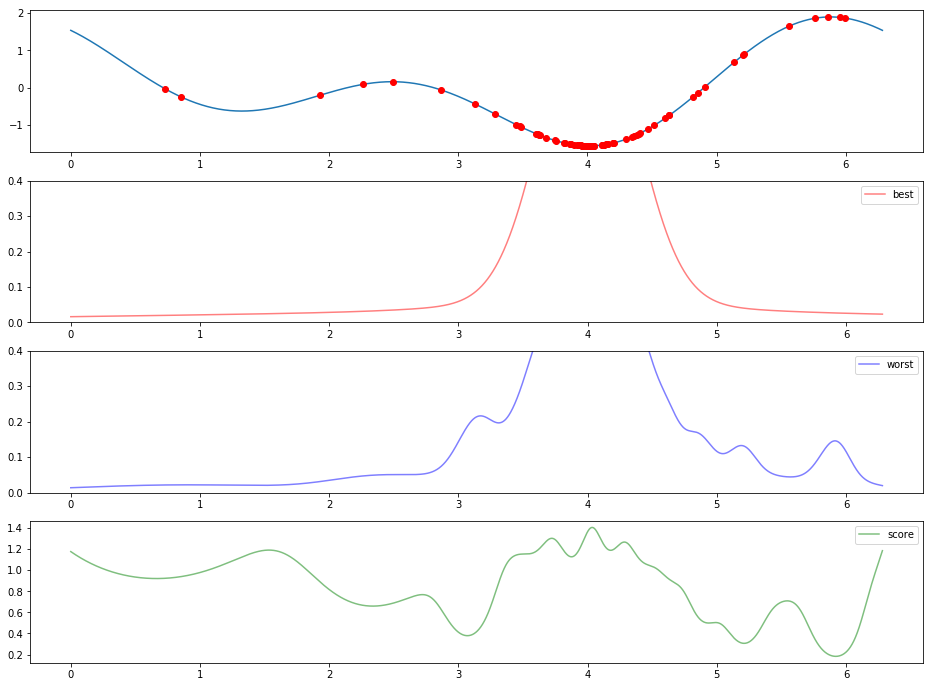

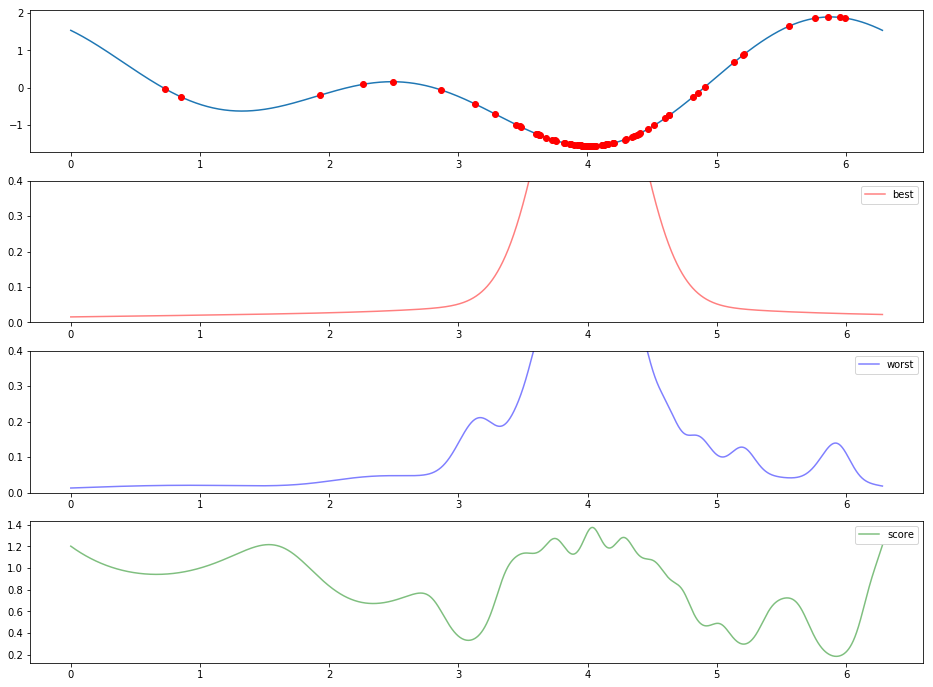

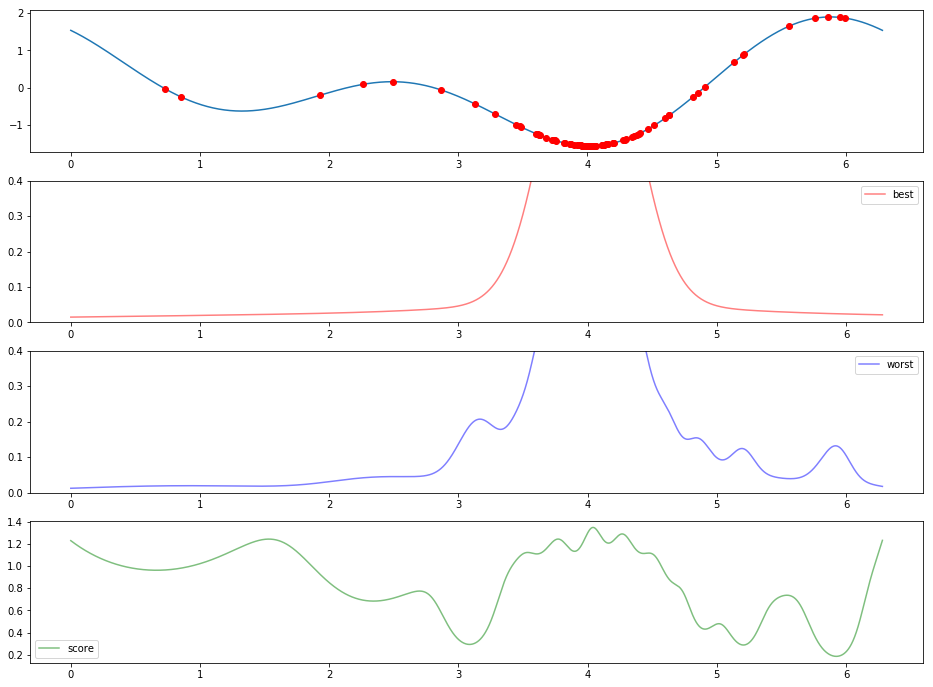

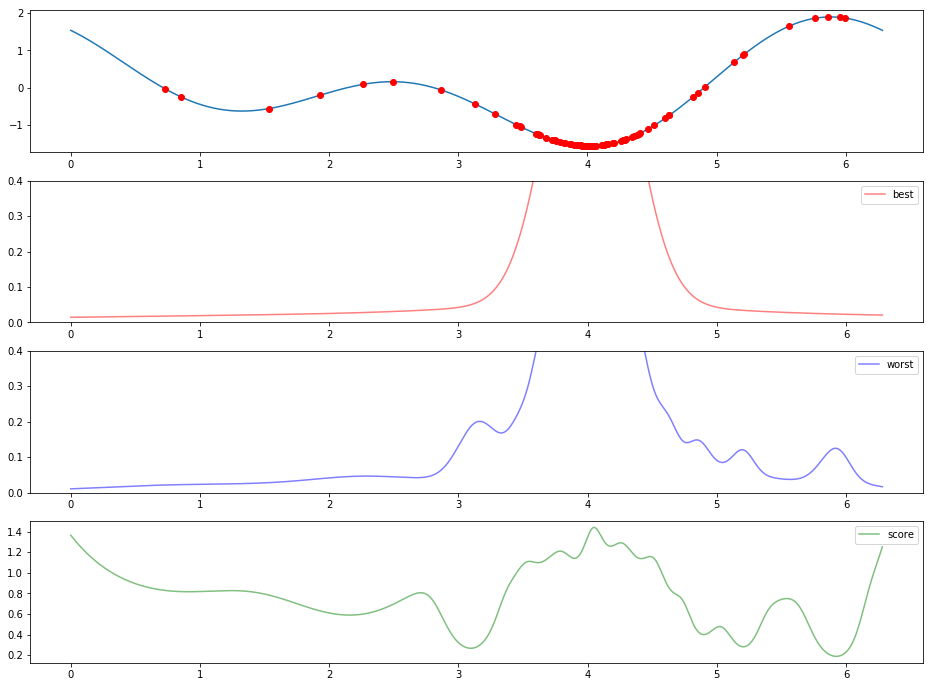

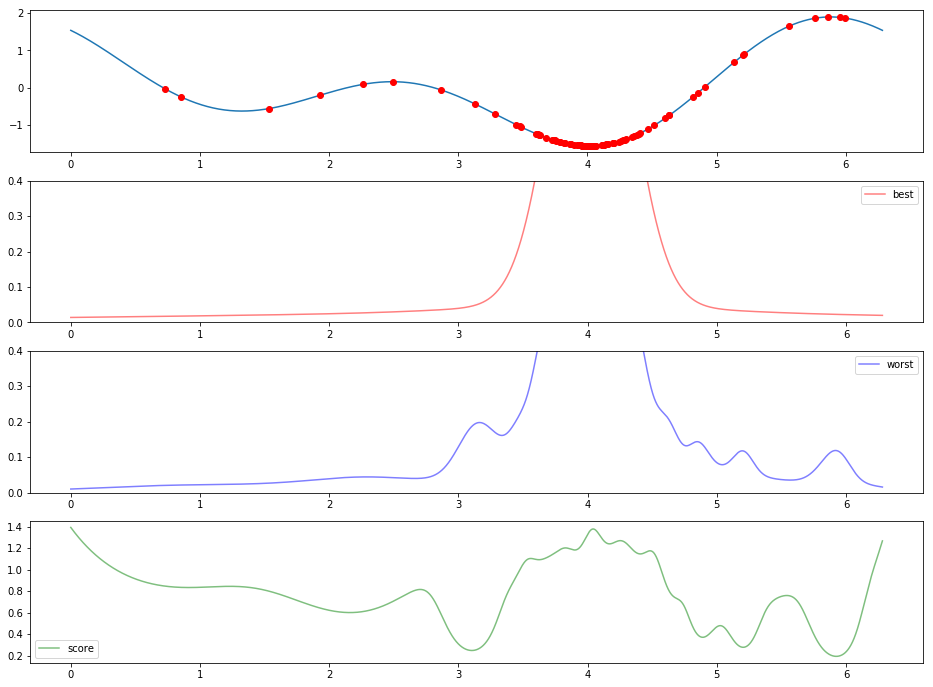

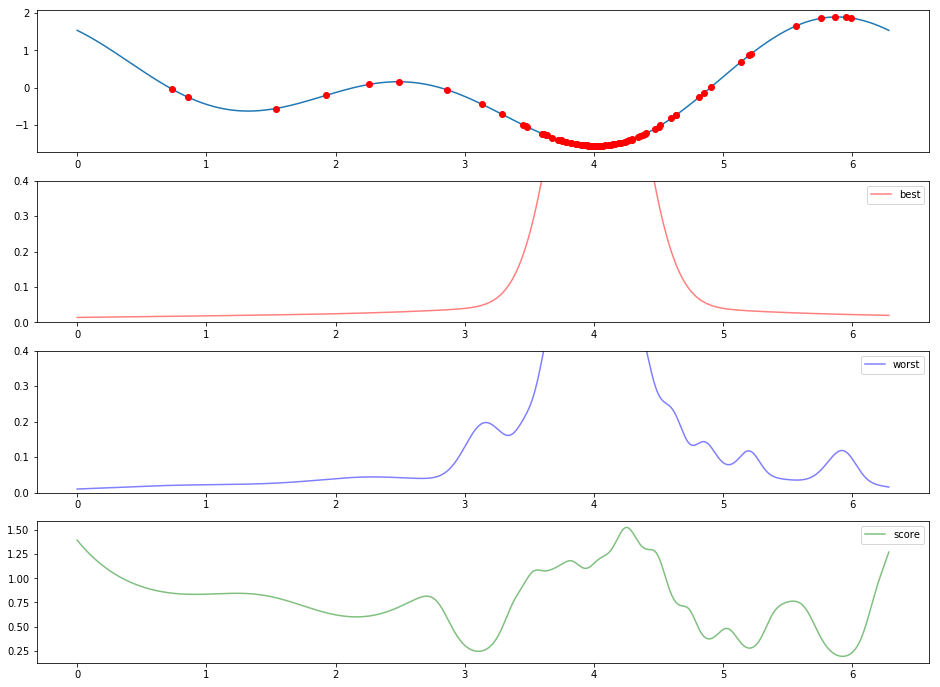

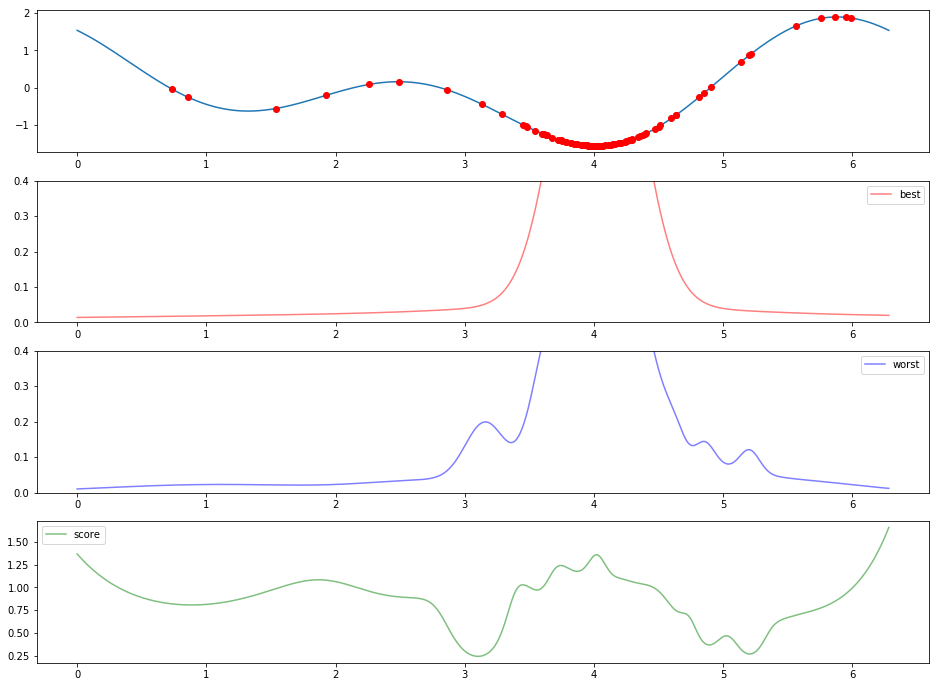

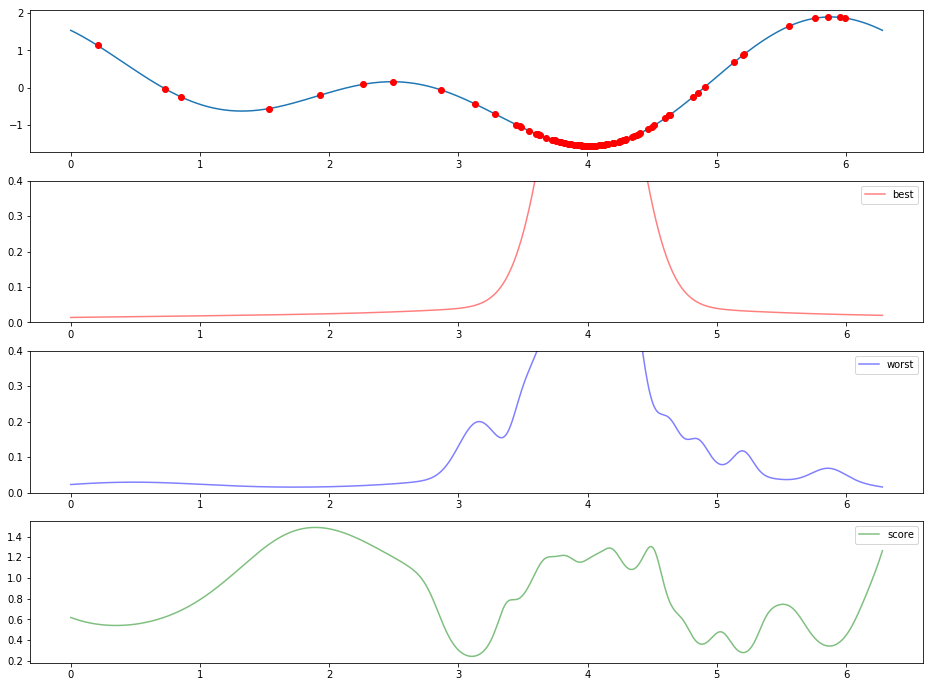

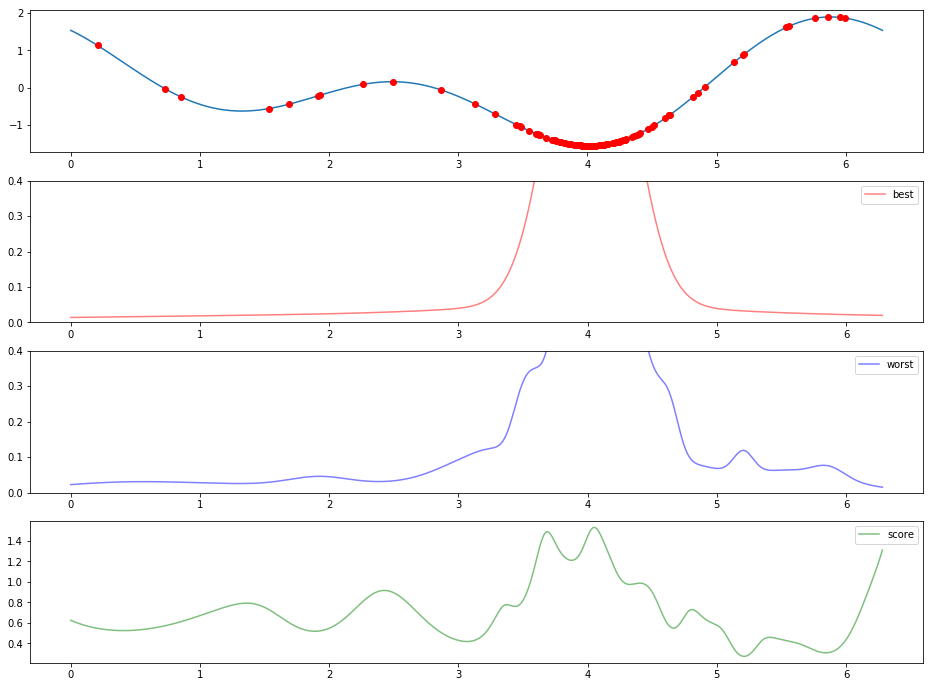

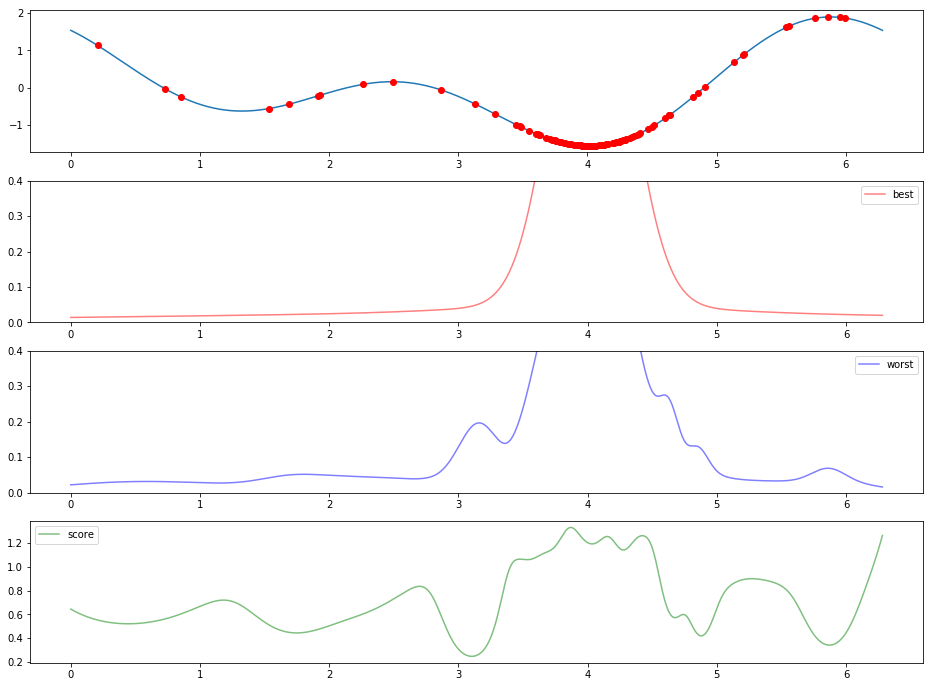

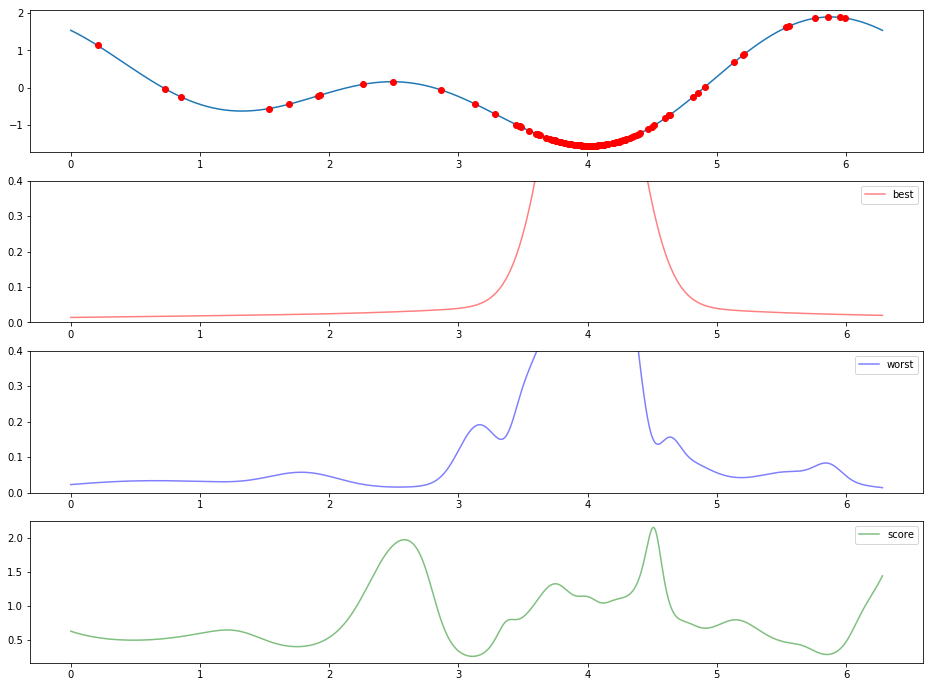

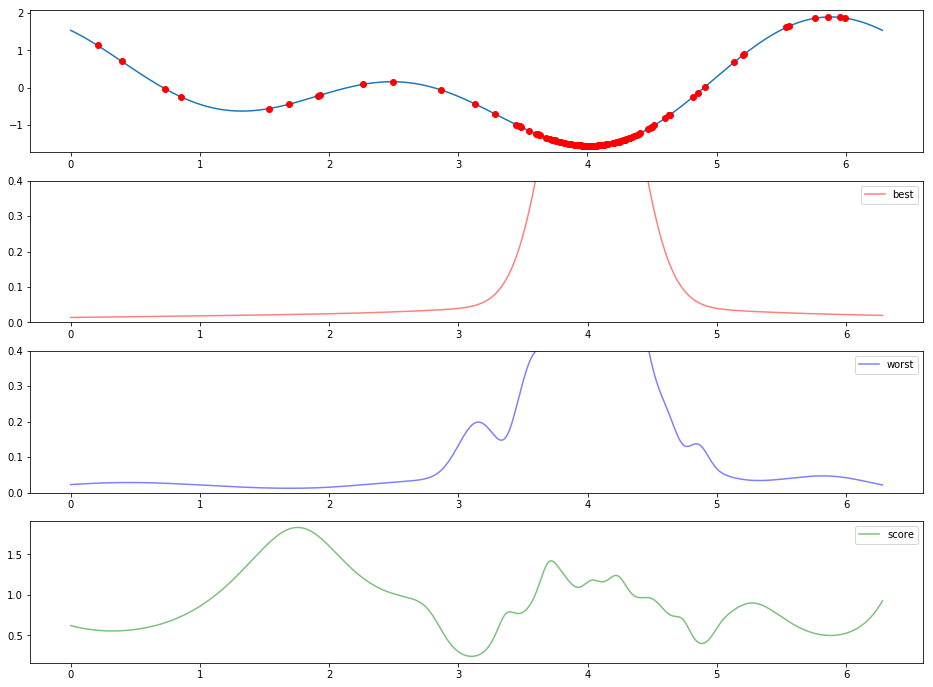

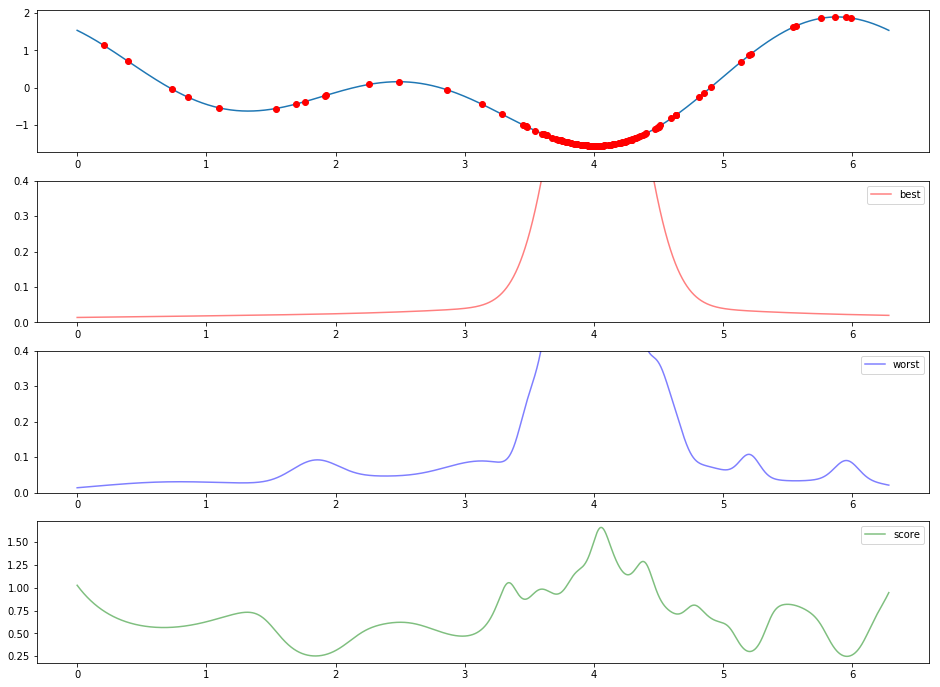

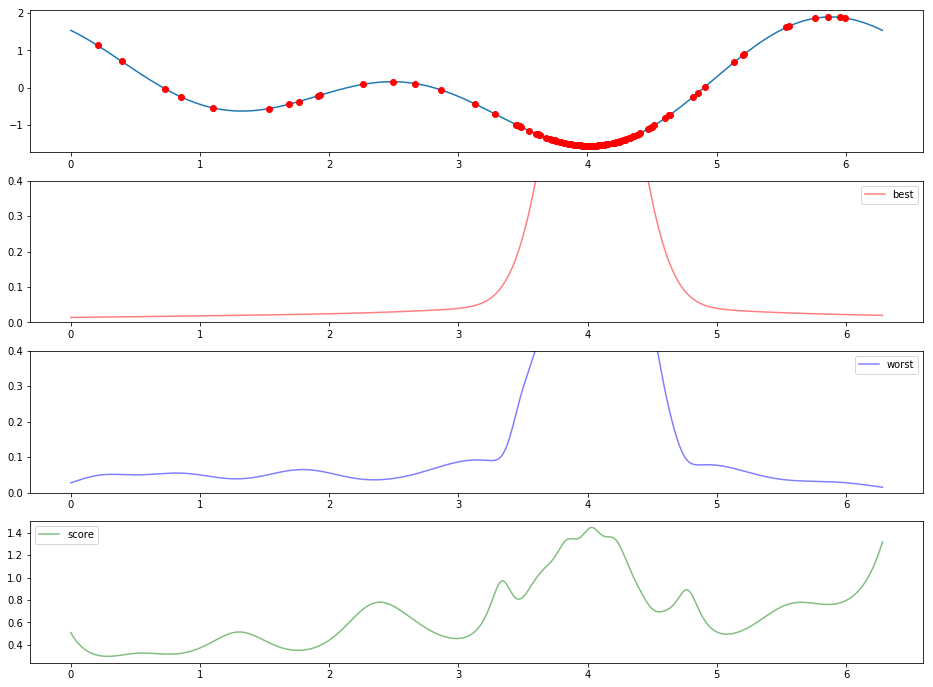

In [32]:
import matplotlib.pyplot as plt

optimization_problem = OptimizationProblem.from_list(optimization_problem_data)
optimizer = optimizers["parzen_estimator"](optimization_problem, minimum_observations=10, gamma=0.20)

for iteration in range(150):
    
    samples, posterior_parameters_l, posterior_parameters_g = optimizer._generate_samples(1, debug=True)
    sample = samples[0]
    if posterior_parameters_l is not None and iteration % 5 == 0:
        posterior_parameter_g = posterior_parameters_g[0]
        posterior_parameter_l = posterior_parameters_l[0]
        tmp = np.linspace(0, np.pi * 2-0.001, 10000)
        y1 = posterior_parameter_l.pdf(tmp)
        y2 = posterior_parameter_g.pdf(tmp)
        scores = (posterior_parameter_l.pdf(tmp) /
                  np.clip(posterior_parameter_g.pdf(tmp),
                          a_min=1e-16,
                          a_max=None))
        plt.figure(figsize=(16, 12))
        plt.subplot(4, 1, 1)
        plt.plot(t, function_to_optimize(t))
        plt.plot([target["x"]], [function_to_optimize(**target)], "ro") 
        plt.plot([observation.sample["x"] for observation in optimization_problem.observations],
                 [observation.loss for observation in optimization_problem.observations], "ro")
        plt.subplot(4, 1, 2)
        plt.plot(tmp, y1, color="r", alpha=0.5, label="best")
        plt.legend()
        plt.ylim([0, 0.4])
        plt.subplot(4, 1, 3)
        plt.plot(tmp, y2, color="b", alpha=0.5, label="worst")
        plt.legend()
        plt.ylim([0, 0.4])
        plt.subplot(4, 1, 4)
        plt.plot(tmp, scores, color="g", alpha=0.5, label="score")
        plt.legend()
        plt.show()


    loss = function_to_optimize(**sample)
    optimization_problem.add_observation(Observation.from_dict({"loss": loss, "sample": sample}))